In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data')
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
df = pd.read_csv('Classified Data', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
# independent and dependet features
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
# knn distance based alogorithm hence the feature scaling is very important

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaler.fit(x_test)

StandardScaler()

In [8]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
x_train

array([[-0.53196544,  0.00335224,  0.35387814, ..., -0.7865758 ,
         0.51888161,  0.30834131],
       [-0.65910826, -0.02342782,  0.30887878, ...,  0.00269835,
        -1.01988164,  0.5958149 ],
       [ 0.74781252,  0.64330341,  0.88037762, ...,  0.25043218,
        -1.32668545,  0.89460794],
       ...,
       [-0.95865447,  1.21716521,  0.37019732, ...,  0.15660302,
        -1.53147149,  0.83687341],
       [ 0.89456164,  0.7725529 , -0.76519625, ...,  0.09649442,
        -1.3683375 ,  0.93893669],
       [ 0.9874497 ,  1.84709403, -1.00554883, ..., -0.34274848,
        -0.22355888, -0.29618168]])

In [10]:
y.unique()

array([1, 0], dtype=int64)

## Finding K value

### Using grid searchCv

In [11]:
# model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# finding n values
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':list(np.arange(1,100,2))}
knn = GridSearchCV(knn,parameters,scoring='accuracy',cv=10)
knn.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59, ...]},
             scoring='accuracy')

In [12]:
# list(np.arange(1,100,1))
print(knn.best_params_)
print(knn.best_score_)

{'n_neighbors': 39}
0.9400000000000001


### K = 1

In [13]:
## resuslts for k = 1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[134   8]
 [ 10 148]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       142
           1       0.95      0.94      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



### K value using cross val score

In [27]:
from sklearn.model_selection import cross_val_score
error_rate = []
accuracy_rate = []
k_values = [i for i in range(1,100,2)]

for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_train,y_train,cv=5)
    accuracy_rate.append(score.mean())
    error_rate.append(1-score.mean())
print(k_values[accuracy_rate.index(max(accuracy_rate))])

29


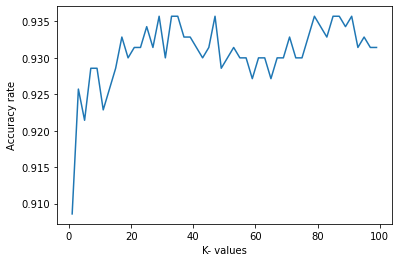

In [28]:
plt.plot(k_values,accuracy_rate)
plt.xlabel('K- values')
plt.ylabel('Accuracy rate')
plt.show()

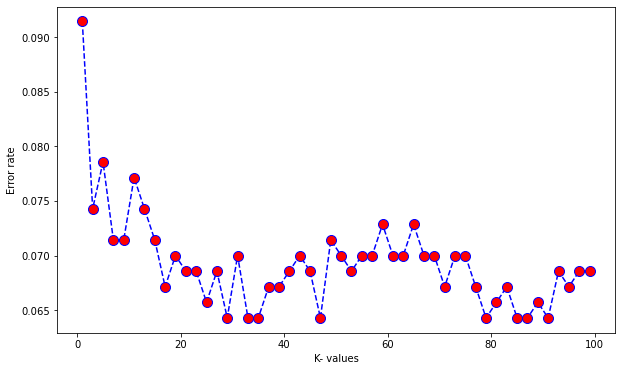

In [29]:
plt.figure(figsize=(10,6))
plt.plot(k_values,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K- values')
plt.ylabel('Error rate')
plt.show()

### Error rate

In [22]:
error_rate = []
k_values = [i for i in range(1,100,2)]

for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)    
    error_rate.append(np.mean(y_pred != y_test))

print(error_rate)

[0.06, 0.06333333333333334, 0.056666666666666664, 0.06, 0.05333333333333334, 0.05333333333333334, 0.04666666666666667, 0.04666666666666667, 0.05, 0.05333333333333334, 0.05, 0.05333333333333334, 0.056666666666666664, 0.056666666666666664, 0.05, 0.05, 0.05, 0.05, 0.05, 0.04666666666666667, 0.04666666666666667, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05333333333333334, 0.056666666666666664, 0.05333333333333334, 0.05333333333333334, 0.05333333333333334, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]


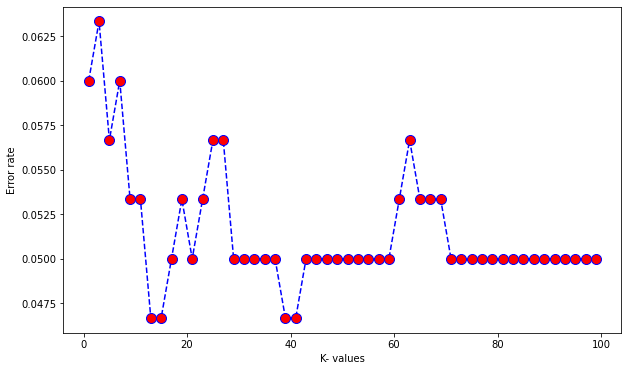

In [23]:
plt.figure(figsize=(10,6))
plt.plot(k_values,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K- values')
plt.ylabel('Error rate')
plt.show()

### K = 39

In [ ]:
## resuslts for k = 1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 39)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print()
print(accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))